### MMD 3.3.2

In [12]:
import numpy as np
M = np.array([
        [0,1,0,1],
        [0,1,0,0],
        [1,0,0,1],
        [0,0,1,0],
        [0,0,1,1],
        [1,0,0,0]])
ele = np.array(range(M.shape[0]))   
h1 = np.mod(ele*2 + 1, 6)
h2 = np.mod(ele*3 + 2, 6)
h3 = np.mod(ele*5 + 2, 6)
print('h1: ', h1)
print('h2: ', h2)
print('h3: ', h3)

h1:  [1 3 5 1 3 5]
h2:  [2 5 2 5 2 5]
h3:  [2 1 0 5 4 3]


### MMD 10.4.2

In [1]:
import numpy as np
A = np.array([
        [0,1,1,0,0,0,0,0,0], # A to B,C
        [1,0,1,0,0,0,0,1,0], # B to A,C,H
        [1,1,0,1,0,0,0,0,0], # C to A,B,D
        [0,0,1,0,1,1,0,0,0], # D to C,E,F
        [0,0,0,1,0,1,1,0,0], # E to D,F,G
        [0,0,0,1,1,0,0,0,0], # F to D,E
        [0,0,0,0,1,0,0,1,1], # G to E,H,I
        [0,1,0,0,0,0,1,0,1], # H to B,G,I
        [0,0,0,0,0,0,1,1,0]  # I to G,H
    ])
D = np.diag([2,3,3,3,3,2,3,3,2])
L = D - A
result = np.linalg.eig(L)
idx = np.argsort(result[0])
# second-smallest eigenvalue and its eigenvector
print('second-smallest eigenvalue: ', np.sort(result[0])[1]) # ASC
print('corresponding vector: ', result[1][idx[1]])

# third-smallest eigenvalue and its eigenvector
print('third-smallest eigenvalue: ', np.sort(result[0])[2]) # ASC
print('corresponding vector: ', result[1][idx[2]])

second-smallest eigenvalue:  0.697224362268
corresponding vector:  [-0.15728598 -0.16666667  0.29389153 -0.33333333  0.28305594 -0.40824829
  0.50834187  0.00210742 -0.48643259]
third-smallest eigenvalue:  0.697224362268
corresponding vector:  [-0.36219431  0.33333333 -0.38287473 -0.33333333  0.10413675 -0.40824829
 -0.3923125   0.23920786 -0.07430338]


In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

/Applications/Pineapple.app/Contents/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


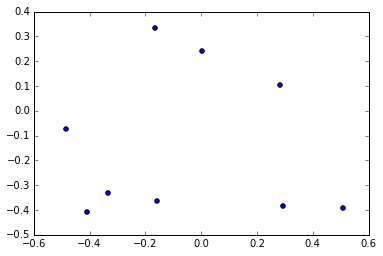

In [8]:
plt.scatter(result[1][idx[1]], result[1][idx[2]])

### FD 7.4

In [41]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

b1 = np.full((50, 50), 0.7) # diagonal block of A
b2 = np.full((50, 50), 0.3) # other blocks of A
A = np.bmat('b1, b2, b2; b2, b1, b2; b2, b2, b1')
B = np.random.rand(150, 150)
con1 = A <= B # condition 1
con2 = A > B # condition 2
A[con1] = 1
A[con2] = 0
A = np.asarray(A)

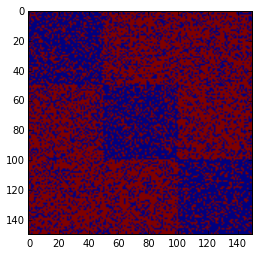

In [45]:
plt.imshow(A)

In [55]:
# randamization along the first axis
A_rand = np.random.RandomState(seed=42).permutation(A)
# randamization, same permutation, along the second axis
A_rand = np.random.RandomState(seed=42).permutation(A_rand.T).T

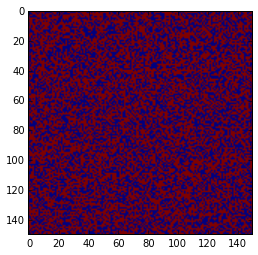

In [56]:
plt.imshow(A_rand)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42).fit(A_rand)
label = kmeans.labels_